C:\Users\Chengtai Li\AppData\Local\Temp\ipykernel_28000\3393746857.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['idssqrt_diff'] = np.gradient(df_filtered['idssqrt'], df_filtered['VG'])
C:\Users\Chengtai Li\AppData\Local\Temp\ipykernel_28000\3393746857.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['result'] = (df_filtered['idssqrt_diff']**2) * 2 / (wl * Ci)


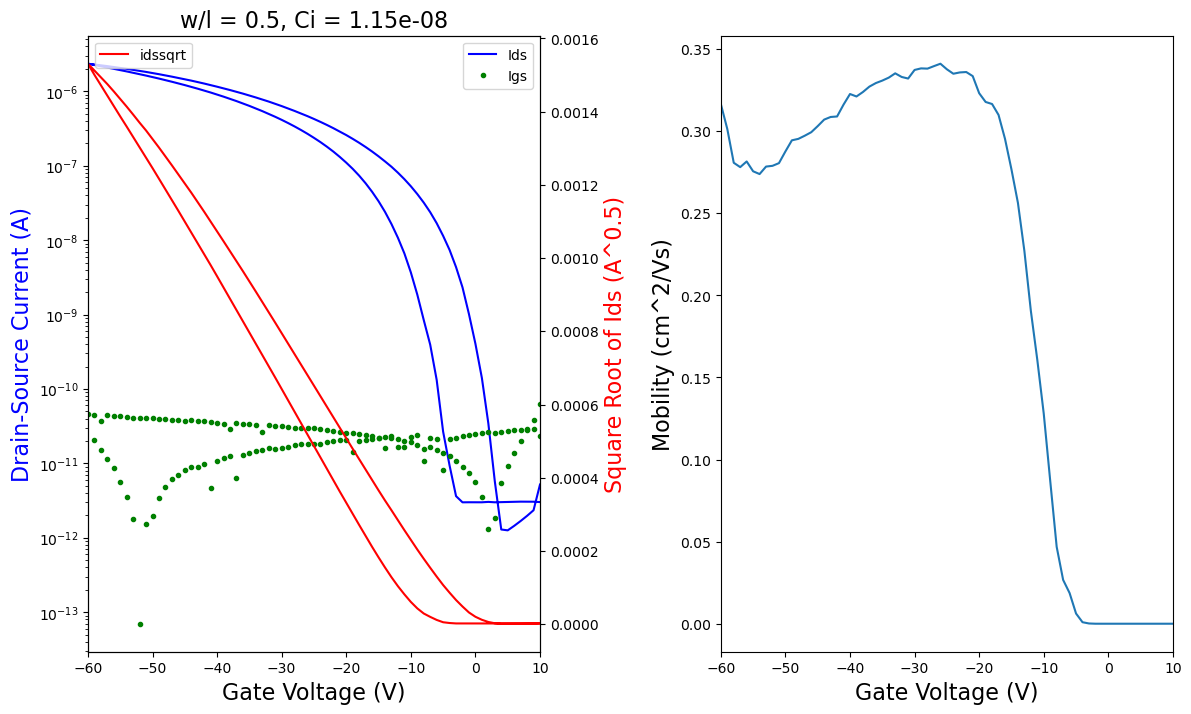

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取文件
file_path = r'D:\IV\20230408IV\wl0.5-pmma10-3.lvm'
df = pd.read_csv(file_path, sep='\t', header=21)

# 删除第一列、第五列、第六列
df = df.drop(df.columns[[0, 4, 5]], axis=1)

# 更改列名
df.columns = ['VG', 'Ids', 'Igs']

# 插入新列
df['idssqrt'] = df['Ids'].apply(lambda x: x**0.5)
df = df[['VG', 'Ids', 'idssqrt', 'Igs']]

# 找到第一个局部最小值（VG=b）的索引
split_index = df[(df['VG'].shift(1) > df['VG']) & (df['VG'].shift(-1) > df['VG'])].index[0]

# 提取第一组循环扫描数据
df_filtered = df.iloc[:split_index + 1]

# 计算idssqrt的一阶微分
df_filtered['idssqrt_diff'] = np.gradient(df_filtered['idssqrt'], df_filtered['VG'])

# 计算所需的数据
wl = 0.5
Ci = 1.15e-8
df_filtered['result'] = (df_filtered['idssqrt_diff']**2) * 2 / (wl * Ci)

# 创建一个1x2的子图布局
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# 绘制第一个子图（交换后）
ax1.plot(df['VG'], df['Ids'], '-', color='blue', label='Ids')
ax1.plot(df['VG'], df['Igs'], 'g.', label='Igs')
ax1.set_xlabel('Gate Voltage (V)', fontsize=16)
ax1.set_ylabel('Drain-Source Current (A)', color='blue', fontsize=16)
ax1.set_yscale('log')
ax1.legend()
ax1.margins(0, 0.05)

ax1_twin = ax1.twinx()
ax1_twin.plot(df['VG'], df['idssqrt'], '-', color='red', label='idssqrt')
ax1_twin.set_ylabel('Square Root of Ids (A^0.5)', color='red', fontsize=16)
ax1_twin.legend(loc='upper left')

# 添加 w/l 和 Ci 的值到第一个子图的标题
ax1.set_title(f'w/l = {wl}, Ci = {Ci:.2e}', fontsize=16)

# 绘制第二个子图（交换后）
ax2.plot(df_filtered['VG'], df_filtered['result'])
ax2.set_xlabel('Gate Voltage (V)', fontsize=16)
ax2.set_ylabel('Mobility (cm^2/Vs)', fontsize=16)
ax2.margins(0, 0.05)

#调整子图间距
plt.subplots_adjust(wspace=0.4)

#显示图形
plt.show()